In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
#pip install textblob

In [3]:
# Load the DataFrame (replace with your actual data loading step)
df = pd.read_csv('./issues_sharing_visualize_output_with_patterns.csv')
df.head()

,Issue Number,Detected Patterns,State,Time Lapsed,Number of Prompts,Conversation,Type,URL,Author,RepoName,...,UpdatedAt,CSharing_URL,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer
0,7,Question Pattern,Open,NaN,1,https://chat.openai.com/share/e377307e-039a-4f...,issue,https://github.com/Shreya-R-Dixit-Memorial-Fou...,arunbatchu,Shreya-R-Dixit-Memorial-Foundation/EyeDaV2,...,2023-06-27T23:15:32Z,https://chat.openai.com/share/e377307e-039a-4f...,200,"June 24, 2023",GitHub-Discord Webhook Integration,1,10,285,how can i make github notifications show up in...,GitHub and Discord don't directly integrate wi...
1,1,Template Pattern,Open,NaN,1,https://chat.openai.com/share/b9df6ce0-f2c9-41...,issue,https://github.com/aahnik/temple-web/issues/1,aahnik,aahnik/temple-web,...,2023-07-10T14:05:15Z,https://chat.openai.com/share/b9df6ce0-f2c9-41...,200,"July 10, 2023",Scroll Zoom & Color Effect,1,121,432,"on scroll, i want to apply zoom and color effe...",To apply the zoom and color effect on images w...
2,39,Output Automator Pattern,Open,NaN,2,https://chat.openai.com/share/47222295-450c-42...,issue,https://github.com/clojure-emacs/clj-suitable/...,vemv,clojure-emacs/clj-suitable,...,2023-07-26T19:02:25Z,https://chat.openai.com/share/47222295-450c-42...,200,"July 26, 2023",JS Regex for Identifiers.,2,127,670,please write a javascript regex that only matc...,"In JavaScript, valid identifiers must follow t..."
3,39,Output Automator Pattern,Open,NaN,2,https://chat.openai.com/share/47222295-450c-42...,issue,https://github.com/clojure-emacs/clj-suitable/...,vemv,clojure-emacs/clj-suitable,...,2023-07-26T19:02:25Z,https://chat.openai.com/share/47222295-450c-42...,200,"July 26, 2023",JS Regex for Identifiers.,2,127,670,Thanks! Now please tell me all reserved words.,"As of 2021, the ECMAScript specification defin..."
4,40,Output Automator Pattern,Open,NaN,5,https://chat.openai.com/share/0b26f548-9912-44...,issue,https://github.com/sanjar-notes/reactjs-notes/...,sanjarcode,sanjar-notes/reactjs-notes,...,2023-07-26T05:14:24Z,https://chat.openai.com/share/0b26f548-9912-44...,200,"July 26, 2023",useLayoutEffect: Advantages & Usage,5,172,1633,Is this a correct understanding of React's use...,Your understanding of useLayoutEffect in React...


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Issue Number                      0
Detected Patterns                 0
State                             0
Time Lapsed                    7357
Number of Prompts                 0
Conversation                      0
Type                              0
URL                               0
Author                            0
RepoName                          0
RepoLanguage                    679
Title                             0
Body                              0
UpdatedAt                         0
CSharing_URL                      0
CSharing_Status                   0
CSharing_DateOfConversation       0
CSharing_Title                    0
CSharing_NumberOfPrompts          0
CSharing_TokensOfPrompts          0
CSharing_TokensOfAnswers          0
Conversation_Prompt               0
Conversation_Answer               0
dtype: int64


In [5]:
# Drop rows with any null values
#df = df.dropna()
#df.isnull().sum()
df.shape

(12618, 23)

In [6]:
unique_values = df['State'].unique()
print(unique_values)

['Open' 'Closed']


In [7]:
# Creating a new DataFrame where 'State' != 'Open'
filtered_without_open_df = df[df['State'] != 'Open']
print(filtered_without_open_df.isnull().sum())
filtered_without_open_df.shape

Issue Number                     0
Detected Patterns                0
State                            0
Time Lapsed                      0
Number of Prompts                0
Conversation                     0
Type                             0
URL                              0
Author                           0
RepoName                         0
RepoLanguage                   256
Title                            0
Body                             0
UpdatedAt                        0
CSharing_URL                     0
CSharing_Status                  0
CSharing_DateOfConversation      0
CSharing_Title                   0
CSharing_NumberOfPrompts         0
CSharing_TokensOfPrompts         0
CSharing_TokensOfAnswers         0
Conversation_Prompt              0
Conversation_Answer              0
dtype: int64


(5261, 23)

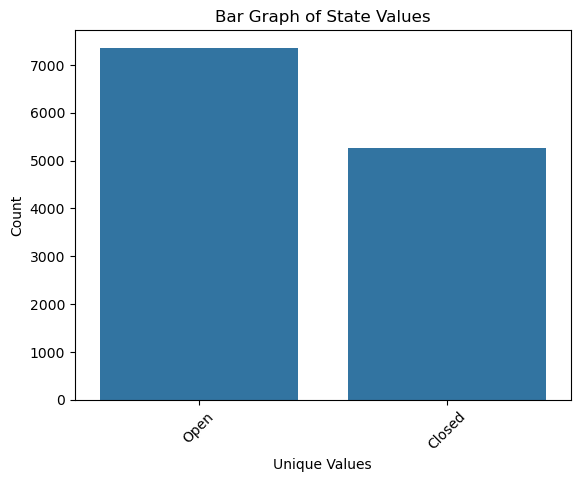

In [9]:
# Count the occurrences of each unique value in the column
value_counts = df['State'].value_counts().reset_index()
value_counts.columns = ['Value', 'Count']  # Rename columns for clarity

# Create a bar graph
sns.barplot(data=value_counts, x='Value', y='Count')

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Graph of State Values')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

In [10]:
# For numerical columns
numerical_cols = filtered_without_open_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = filtered_without_open_df[numerical_cols].corr()

# Display the correlation matrix
#print("Correlation Matrix (Numerical Columns):")
#print(correlation_matrix)

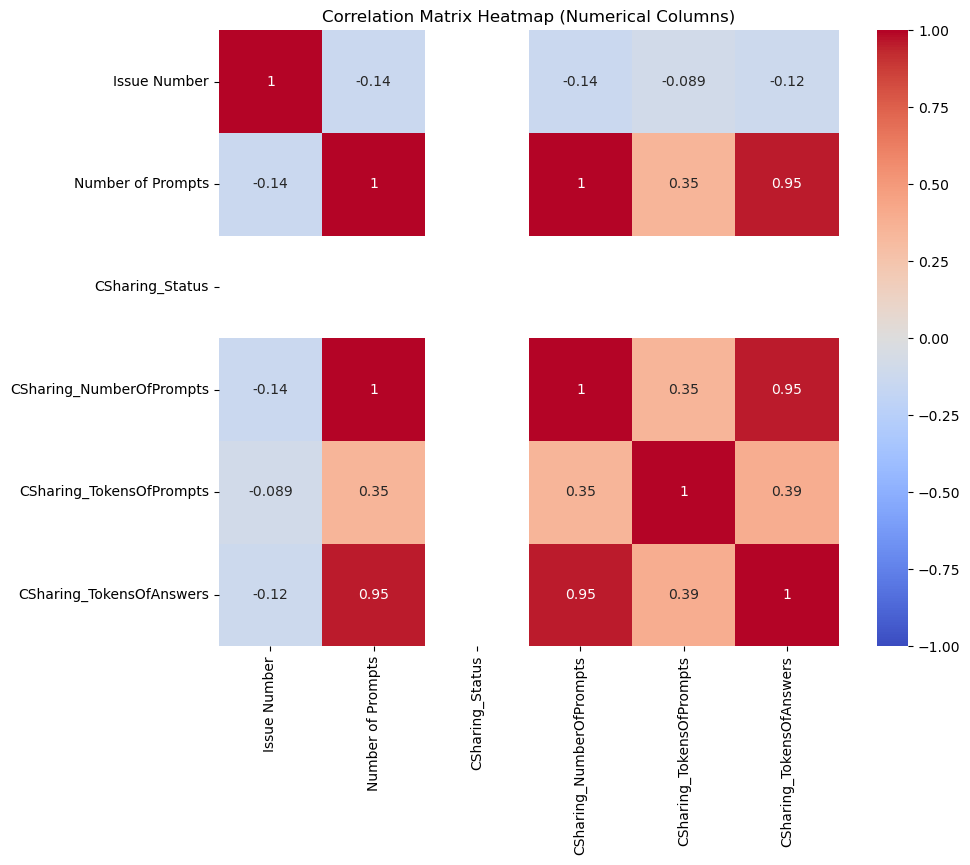

In [11]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Numerical Columns)")
plt.show()

In [12]:
# Before introducing the Effcetiveness_score
categorical_cols = filtered_without_open_df.select_dtypes(include=['object']).columns

df_copy = filtered_without_open_df.copy()

label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
    label_encoders[col] = le

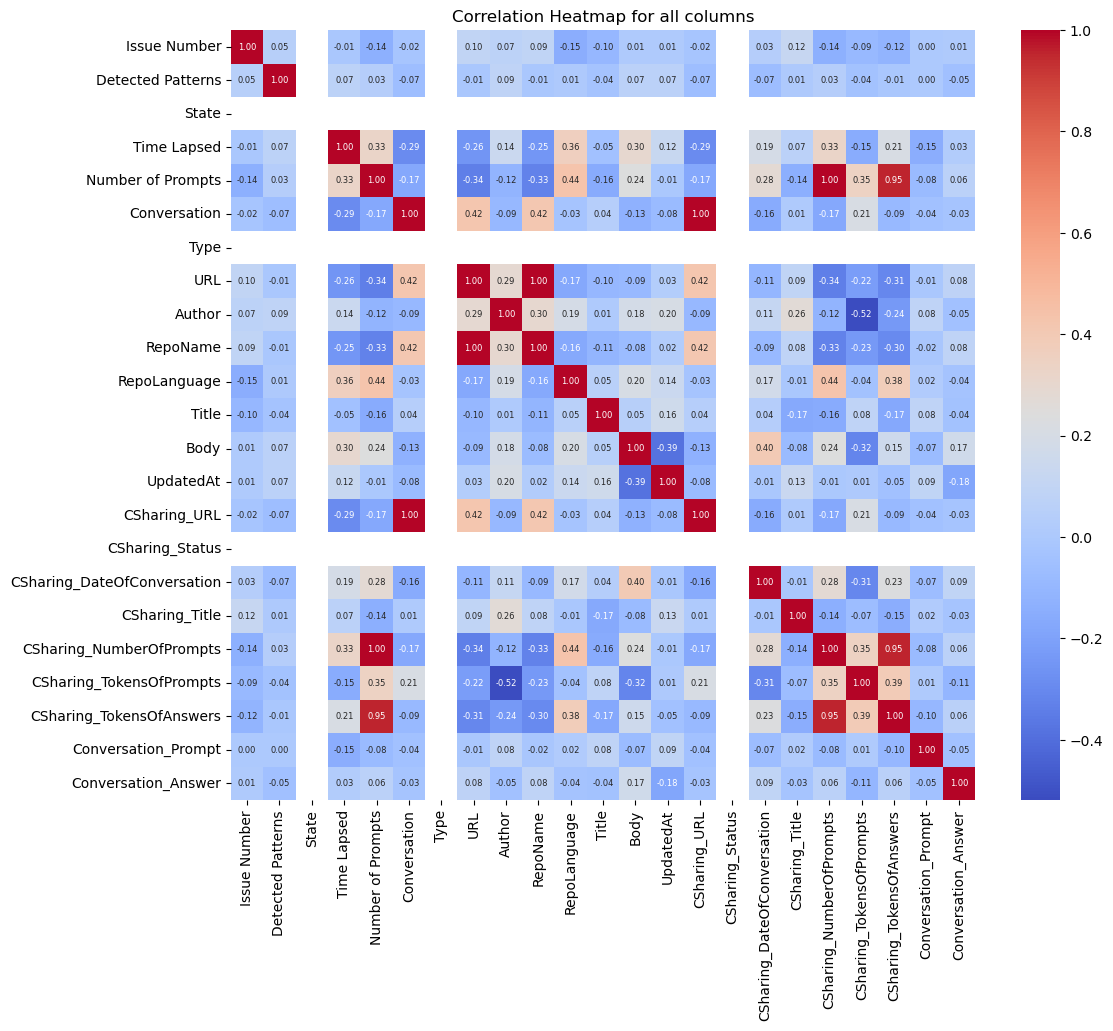

In [13]:
correlation_matrix = df_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 6})
plt.title("Correlation Heatmap for all columns")
plt.xticks()
plt.yticks()
plt.show()

In [14]:
# On the basis of above correlation matrix chose columns for calculating the effectiveness of the prompt 
filtered_without_open_df['Conversation_Answer'] = filtered_without_open_df['Conversation_Answer'].astype(str)

# Define the effectiveness calculation function
def calculate_effectiveness(row):
    # Calculate response length score
    response_length_score = len(row['Conversation_Answer'].split()) if row['Conversation_Answer'] else 0
    
    # Calculate the prompt-answer token ratio
    prompt_answer_ratio = row['CSharing_TokensOfAnswers'] / (row['CSharing_TokensOfPrompts'] + 1)  # Adding 1 to avoid division by zero
    
    # Sentiment Analysis (if Conversation_Answer is non-empty)
    sentiment_score = TextBlob(row['Conversation_Answer']).sentiment.polarity if row['Conversation_Answer'] else 0

    # Weight these metrics to form a composite effectiveness score
    effectiveness_score = (0.5 * response_length_score + 0.3 * prompt_answer_ratio + 0.2 * sentiment_score)
    return effectiveness_score

# Apply the function to calculate the effectiveness score
filtered_without_open_df['Effectiveness_Score'] = filtered_without_open_df.apply(calculate_effectiveness, axis=1)

# Display the DataFrame with the new Effectiveness_Score column
print(filtered_without_open_df[['Conversation_Prompt', 'Effectiveness_Score']])

C:\Users\Dell\AppData\Local\Temp\ipykernel_28932\598930469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_without_open_df['Conversation_Answer'] = filtered_without_open_df['Conversation_Answer'].astype(str)


                                     Conversation_Prompt  Effectiveness_Score
107    write me code to add an axios interceptor to a...            85.909237
108    so I use the exported axiosInstance everywhere...            40.365070
109    ok cool, I'll try this when I'm back from the ...            23.365070
129    I have the following bash code\n\n# Wrap up he...            39.758516
130    I have the following bash code\n\n# Wrap up he...            39.758516
...                                                  ...                  ...
12613  I wish that in typescript I could mark a funct...           115.960860
12614  Are there no other options that use static ana...           109.475340
12615  Are there no other options that use static ana...           109.475340
12616  Write me an eslint rule that would warn on the...           103.480952
12617  Write me an eslint rule that would warn on the...           103.480952

[5261 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_28932\598930469.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_without_open_df['Effectiveness_Score'] = filtered_without_open_df.apply(calculate_effectiveness, axis=1)


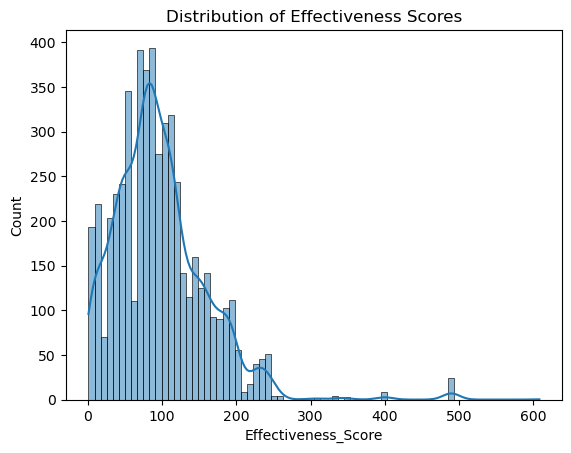

In [15]:
sns.histplot(filtered_without_open_df['Effectiveness_Score'], kde=True)
plt.title('Distribution of Effectiveness Scores')
plt.show()

In [16]:
# Split the Detected Patterns into multiple rows
filtered_without_open_df = filtered_without_open_df.assign(Detected_Patterns=df['Detected Patterns'].str.split(',')).explode('Detected_Patterns')

# Strip whitespace from patterns (if needed)
filtered_without_open_df['Detected_Patterns'] = filtered_without_open_df['Detected_Patterns'].str.strip()

In [17]:
# Group by individual patterns and calculate average effectiveness score
pattern_scores = filtered_without_open_df.groupby('Detected_Patterns')['Effectiveness_Score'].mean().reset_index()

In [18]:
# Sort patterns by effectiveness score
ranked_patterns = pattern_scores.sort_values(by='Effectiveness_Score', ascending=False)
print(ranked_patterns)

                 Detected_Patterns  Effectiveness_Score
2                  Persona Pattern           155.414968
3                 Question Pattern           104.384771
0  Context and Instruction Pattern            97.889631
1         Output Automator Pattern            94.211404
5       Simple Instruction Pattern            88.156714
4                   Recipe Pattern            75.838237
6                 Template Pattern            66.779299


In [19]:
# Count occurrences of each pattern
pattern_frequencies = filtered_without_open_df['Detected_Patterns'].value_counts().reset_index()
pattern_frequencies.columns = ['Detected_Patterns', 'Frequency']

# Merge frequencies with effectiveness scores
pattern_analysis = ranked_patterns.merge(pattern_frequencies, on='Detected_Patterns')

In [32]:
# Normalize effectiveness score by frequency
pattern_analysis['Normalized_Score'] = pattern_analysis['Effectiveness_Score'] / pattern_analysis['Frequency']
print(pattern_analysis)

                 Detected_Patterns  Effectiveness_Score  Frequency  \
0                  Persona Pattern           155.414968        147   
1                 Question Pattern           104.384771       1861   
2  Context and Instruction Pattern            97.889631        231   
3         Output Automator Pattern            94.211404       1754   
4       Simple Instruction Pattern            88.156714        890   
5                   Recipe Pattern            75.838237        175   
6                 Template Pattern            66.779299        203   

   Normalized_Score  
0          1.057245  
1          0.056091  
2          0.423765  
3          0.053712  
4          0.099052  
5          0.433361  
6          0.328962  


C:\Users\Dell\AppData\Local\Temp\ipykernel_28932\1814943443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pattern_analysis, x='Detected_Patterns', y='Normalized_Score', palette='viridis')


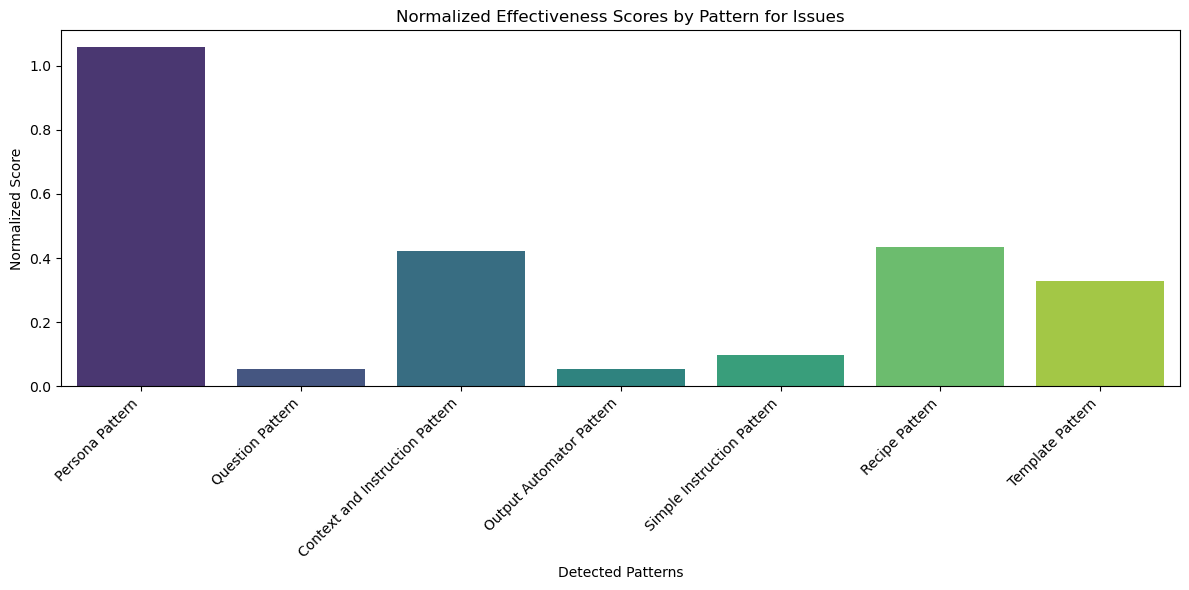

In [21]:
# Bar plot of average effectiveness scores
plt.figure(figsize=(12, 6))
sns.barplot(data=pattern_analysis, x='Detected_Patterns', y='Normalized_Score', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Effectiveness Scores by Pattern for Issues')
plt.xlabel('Detected Patterns')
plt.ylabel('Normalized Score')
plt.tight_layout()
plt.show()

In [22]:
# Group by Detected Patterns and calculate mean scores and prompts
pattern_analysis_interactions = filtered_without_open_df.groupby('Detected_Patterns').agg({
    'Effectiveness_Score': 'mean',
    'CSharing_NumberOfPrompts': 'mean'
}).reset_index()

# Rename columns for clarity
pattern_analysis_interactions.rename(columns={
    'Effectiveness_Score': 'Average_Effectiveness_Score',
    'CSharing_NumberOfPrompts': 'Average_Number_Of_Prompts'
}, inplace=True)

# Calculate a combined metric (optional)
# Higher scores for patterns that have high effectiveness and fewer prompts
pattern_analysis_interactions['Score_Ratio'] = pattern_analysis_interactions['Average_Effectiveness_Score'] / pattern_analysis_interactions['Average_Number_Of_Prompts']

# Sort by the combined score
pattern_analysis_interactions = pattern_analysis_interactions.sort_values(by='Score_Ratio', ascending=False)

# Display results
print(pattern_analysis_interactions)

                 Detected_Patterns  Average_Effectiveness_Score  \
2                  Persona Pattern                   155.414968   
0  Context and Instruction Pattern                    97.889631   
6                 Template Pattern                    66.779299   
1         Output Automator Pattern                    94.211404   
5       Simple Instruction Pattern                    88.156714   
3                 Question Pattern                   104.384771   
4                   Recipe Pattern                    75.838237   

   Average_Number_Of_Prompts  Score_Ratio  
2                   2.938776    52.884260  
0                   7.207792    13.581084  
6                   5.433498    12.290297  
1                   8.220068    11.461146  
5                   8.703371    10.129031  
3                  11.156905     9.356069  
4                   9.360000     8.102376  


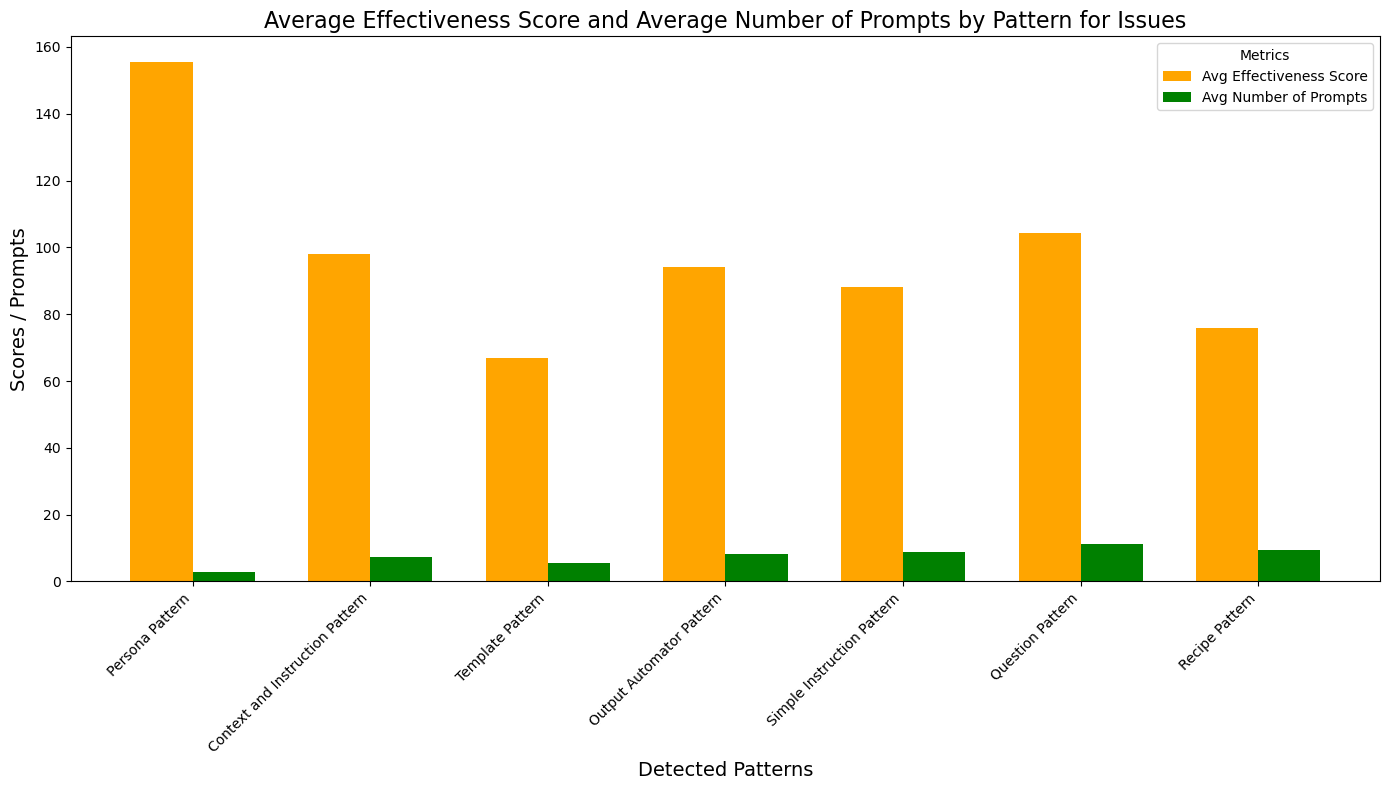

In [23]:
# Bar plot: Average Effectiveness Score and Average Number of Prompts
# Set figure size
plt.figure(figsize=(14, 8))

# Set the bar width
bar_width = 0.35

# Set positions for each bar
index = np.arange(len(pattern_analysis_interactions))

# Create the bar plot for Average Effectiveness Score (Blue bars)
plt.bar(index, pattern_analysis_interactions['Average_Effectiveness_Score'], 
        bar_width, label='Avg Effectiveness Score', color='orange')

# Create the bar plot for Average Number of Prompts (Orange bars)
plt.bar(index + bar_width, pattern_analysis_interactions['Average_Number_Of_Prompts'], 
        bar_width, label='Avg Number of Prompts', color='green')

# Add labels and title
plt.xlabel('Detected Patterns', fontsize=14)
plt.ylabel('Scores / Prompts', fontsize=14)
plt.title('Average Effectiveness Score and Average Number of Prompts by Pattern for Issues', fontsize=16)

# Set X-axis ticks to match the patterns
plt.xticks(index + bar_width / 2, pattern_analysis_interactions['Detected_Patterns'], rotation=45, ha='right')

# Add a legend
plt.legend(title='Metrics')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_28932\4223640444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pattern_analysis, x='Detected_Patterns', y='Normalized_Score', palette='viridis', ax=axs[0])


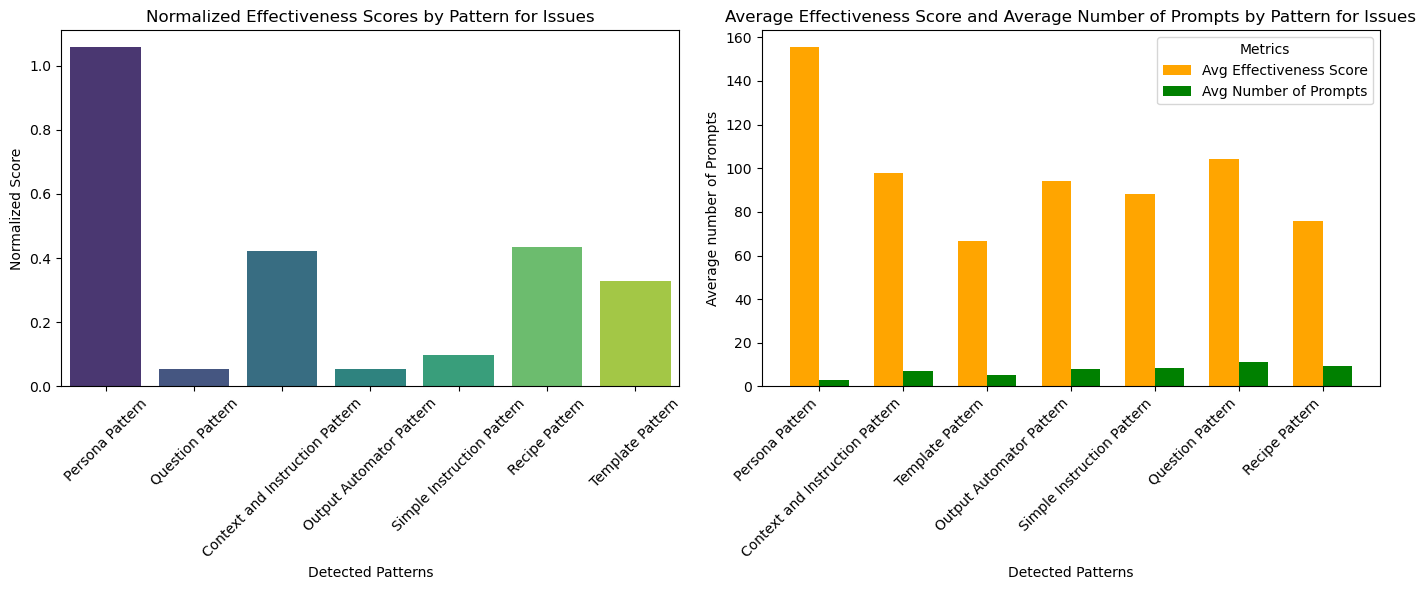

In [24]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First subplot: Bar plot of average effectiveness scores
sns.barplot(data=pattern_analysis, x='Detected_Patterns', y='Normalized_Score', palette='viridis', ax=axs[0])
axs[0].set_title('Normalized Effectiveness Scores by Pattern for Issues')
axs[0].set_xlabel('Detected Patterns')
axs[0].set_ylabel('Normalized Score')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot: Average Effectiveness Score and Average Number of Prompts
# Set the bar width
bar_width = 0.35

# Set positions for each bar
index = np.arange(len(pattern_analysis_interactions))

# Create the bar plot for Average Effectiveness Score (Orange bars)
axs[1].bar(index, pattern_analysis_interactions['Average_Effectiveness_Score'], 
            bar_width, label='Avg Effectiveness Score', color='orange')

# Create the bar plot for Average Number of Prompts (Green bars)
axs[1].bar(index + bar_width, pattern_analysis_interactions['Average_Number_Of_Prompts'], 
            bar_width, label='Avg Number of Prompts', color='green')

# Add labels and title for the second subplot
axs[1].set_xlabel('Detected Patterns', fontsize=10)
axs[1].set_ylabel('Average number of Prompts', fontsize=10)
axs[1].set_title('Average Effectiveness Score and Average Number of Prompts by Pattern for Issues', fontsize=12)

# Set X-axis ticks to match the patterns
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(pattern_analysis_interactions['Detected_Patterns'], rotation=45, ha='right')

# Add a legend to the second subplot
axs[1].legend(title='Metrics')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the combined plot
plt.show()

In [25]:
from scipy.stats import f_oneway

# Perform ANOVA to test if the means of Effectiveness Scores differ across Detected Patterns
patterns = filtered_without_open_df['Detected_Patterns'].unique()
anova_result = f_oneway(*[filtered_without_open_df[filtered_without_open_df['Detected_Patterns'] == pattern]['Effectiveness_Score'] for pattern in patterns])
print("ANOVA Test Result:", anova_result)

ANOVA Test Result: F_onewayResult(statistic=41.31477037882128, pvalue=1.8022132171425894e-49)


In [26]:
cat_cols = filtered_without_open_df.select_dtypes(include=['object']).columns
df_copy_2 = filtered_without_open_df.copy()

label_encoders = {}  
for col in cat_cols:
    le = LabelEncoder()
    df_copy_2[col] = le.fit_transform(df_copy_2[col].astype(str))
    label_encoders[col] = le

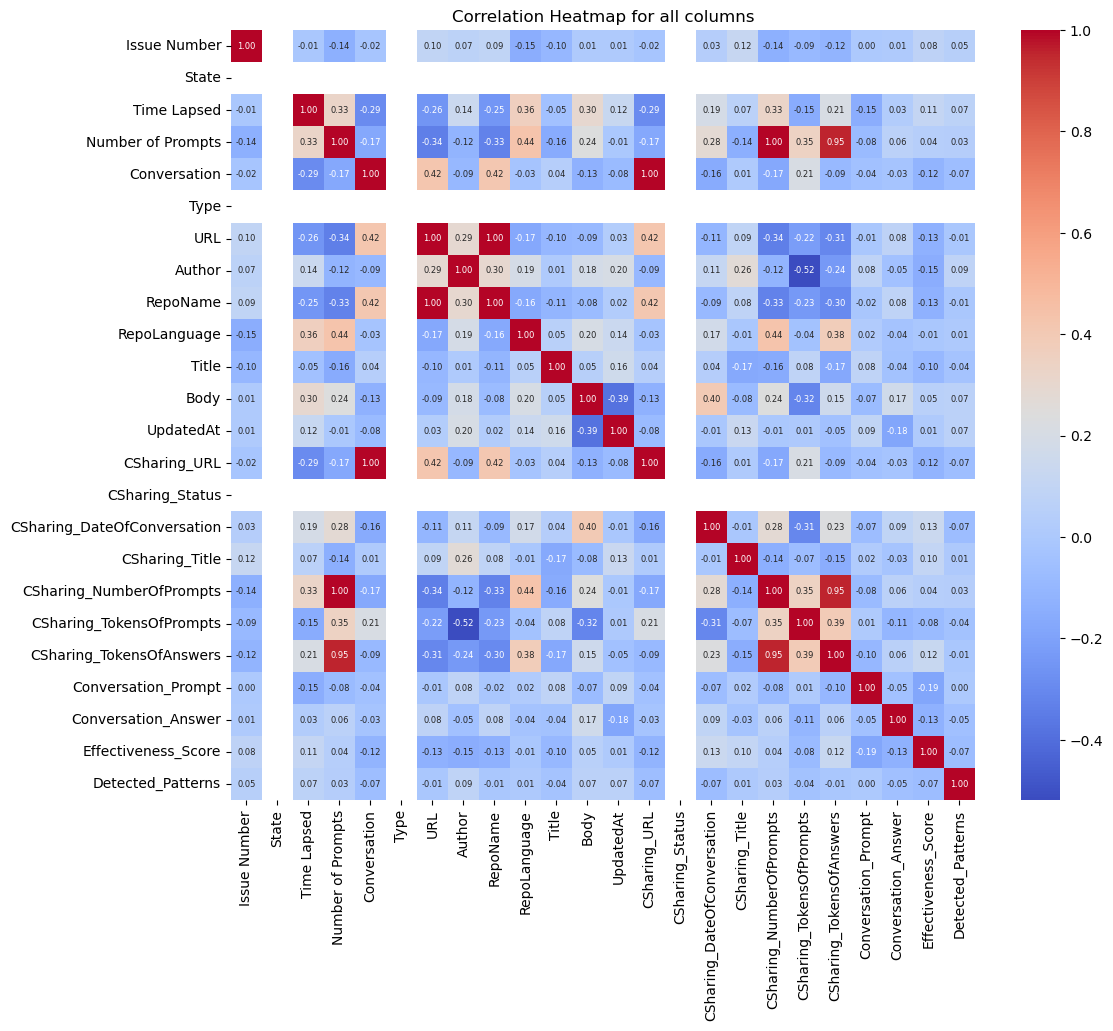

In [27]:
correlation_matrix = df_copy_2.corr()

correlation_matrix = correlation_matrix.drop('Detected Patterns', axis=1).drop('Detected Patterns', axis=0)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 6})
plt.title("Correlation Heatmap for all columns")
plt.xticks()
plt.yticks()
plt.show()

In [28]:
filtered_without_open_df.head()

,Issue Number,Detected Patterns,State,Time Lapsed,Number of Prompts,Conversation,Type,URL,Author,RepoName,...,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer,Effectiveness_Score,Detected_Patterns
107,5,Output Automator Pattern,Closed,5 days 03:35:30,3,https://chat.openai.com/share/86111521-7f64-4c...,issue,https://github.com/neilenns/react-access-code-...,neilenns,neilenns/react-access-code-map,...,200,"July 3, 2023",Axios interceptor with Bearer token.,3,70,555,write me code to add an axios interceptor to a...,Sure! Here's an example of how you can add an ...,85.909237,Output Automator Pattern
108,5,Output Automator Pattern,Closed,5 days 03:35:30,3,https://chat.openai.com/share/86111521-7f64-4c...,issue,https://github.com/neilenns/react-access-code-...,neilenns,neilenns/react-access-code-map,...,200,"July 3, 2023",Axios interceptor with Bearer token.,3,70,555,so I use the exported axiosInstance everywhere...,"Yes, that's correct! Instead of using the axio...",40.365070,Output Automator Pattern
109,5,Output Automator Pattern,Closed,5 days 03:35:30,3,https://chat.openai.com/share/86111521-7f64-4c...,issue,https://github.com/neilenns/react-access-code-...,neilenns,neilenns/react-access-code-map,...,200,"July 3, 2023",Axios interceptor with Bearer token.,3,70,555,"ok cool, I'll try this when I'm back from the ...",That sounds like a plan! Enjoy the Portland Pi...,23.365070,Output Automator Pattern
129,1,Output Automator Pattern,Closed,5 days 10:26:30,2,https://chat.openai.com/share/2923bee5-8f62-4b...,issue,https://github.com/dantebarba/docker-rclone/is...,dantebarba,dantebarba/docker-rclone,...,200,"July 14, 2023",Adding Success Codes,2,371,824,I have the following bash code\n\n# Wrap up he...,To add a list of successful return codes and c...,39.758516,Output Automator Pattern
130,1,Simple Instruction Pattern,Closed,5 days 10:26:30,2,https://chat.openai.com/share/2923bee5-8f62-4b...,issue,https://github.com/dantebarba/docker-rclone/is...,dantebarba,dantebarba/docker-rclone,...,200,"July 14, 2023",Adding Success Codes,2,371,824,I have the following bash code\n\n# Wrap up he...,To add a list of successful return codes and c...,39.758516,Simple Instruction Pattern


In [29]:
# Encode categorical columns
df_ml =  filtered_without_open_df.drop(columns='Detected Patterns')
cat_cols = df_ml.select_dtypes(include=['object']).columns

import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=cat_cols)
df_ml = binary_encoder.fit_transform(df_ml)

# View the encoded dataframe
print(df_ml.head())
df_ml.shape

     Issue Number  State_0  Time Lapsed_0  Time Lapsed_1  Time Lapsed_2  \
107             5        1              0              0              0   
108             5        1              0              0              0   
109             5        1              0              0              0   
129             1        1              0              0              0   
130             1        1              0              0              0   

     Time Lapsed_3  Time Lapsed_4  Time Lapsed_5  Time Lapsed_6  \
107              0              0              0              0   
108              0              0              0              0   
109              0              0              0              0   
129              0              0              0              1   
130              0              0              0              1   

     Time Lapsed_7  ...  Conversation_Answer_4  Conversation_Answer_5  \
107              1  ...                      0                      0   


(5261, 121)

In [30]:
# Save the DataFrame to a CSV file
df_ml.to_csv('issues_sharing_output_with_patterns_effectiveness_score.csv', index=False)

In [31]:
import sweetviz as sv

# Generate the analysis report
report = sv.analyze(filtered_without_open_df)

# Save and display the report
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
